# 240970107
Vikith B Kotian

In [3]:
#Using the given IPL 2013 dataset, apply Linear Regression techniques to predict player auction prices and performance statistics.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
df=pd.read_csv("./Materials/IPL DATA2013.csv")

In [4]:
#1. Price Prediction from Batting Stats 
#• Build a linear regression model to predict SOLD PRICE based on batting stats such as 
#RUNS-S, HS (High Score), SR-B (Strike Rate), SIXERS. 
#• Evaluate model accuracy using R² score and RMSE. 
#• Visualize the predicted vs actual prices with a scatter plot.

Batting Model R2: 0.266
Batting Model RMSE: 316135.83


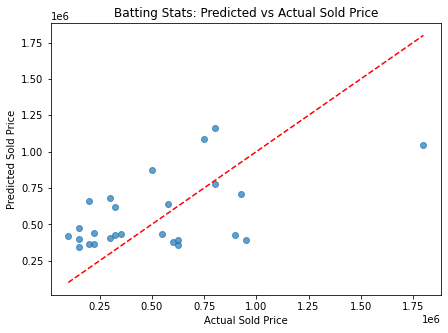

In [5]:
X = df[['RUNS-S', 'HS', 'SR-B', 'SIXERS']]
y = df['SOLD PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Batting Model R2: {r2:.3f}")
print(f"Batting Model RMSE: {rmse:.2f}")

# Plot Predicted vs Actual
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Sold Price")
plt.ylabel("Predicted Sold Price")
plt.title("Batting Stats: Predicted vs Actual Sold Price")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


Bowling Model R²: 0.079
Bowling Model RMSE: 354193.58

Feature importance (coefficients):
  Feature  Coefficient
2    ECON -8185.005700
1  AVE-BL  4172.406266
3   SR-BL -2505.340876
0    WKTS  1050.434506


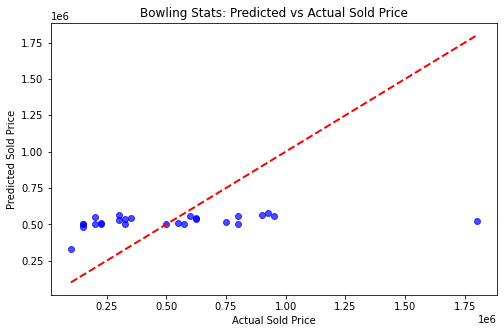

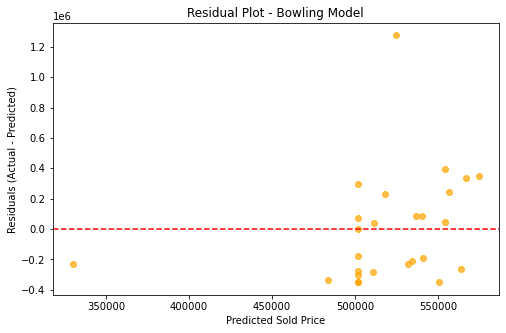

In [6]:
#2. Price Prediction from Bowling Stats 
#• Train a linear regression model to predict SOLD PRICE using bowling features: WKTS, 
#AVE-BL, ECON, SR-BL. 
#• Compare predicted vs actual prices and check which bowling feature contributes most (via 
#coefficients). 
#• Plot residuals to check model errors. 

X = df[['WKTS', 'AVE-BL', 'ECON', 'SR-BL']]
y = df['SOLD PRICE']

# Split data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_bowling = LinearRegression()
lr_bowling.fit(X_train, y_train)

y_pred = lr_bowling.predict(X_test)

# Evaluate model
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Bowling Model R²: {r2:.3f}")
print(f"Bowling Model RMSE: {rmse:.2f}")

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_bowling.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nFeature importance (coefficients):")
print(coef_df)

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sold Price')
plt.ylabel('Predicted Sold Price')
plt.title('Bowling Stats: Predicted vs Actual Sold Price')
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.7, color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Sold Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot - Bowling Model')
plt.show()


Mean Absolute Error (MAE): 268302.61


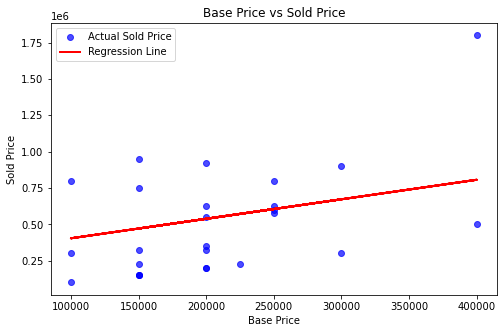

In [7]:
#3. Base Price vs Sold Price Relationship 
#• Fit a regression model with BASE PRICE as input and SOLD PRICE as output. 
#• Check accuracy using Mean Absolute Error (MAE). 
#• Visualize using a regression line plot. 

X = df[['BASE PRICE']]
y = df['SOLD PRICE']

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_base = LinearRegression()
lr_base.fit(X_train, y_train)

y_pred = lr_base.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue', alpha=0.7, label='Actual Sold Price')
plt.plot(X_test.values.flatten(), y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Base Price')
plt.ylabel('Sold Price')
plt.title('Base Price vs Sold Price')
plt.legend()
plt.show()

Multi-feature Model R²: 0.3517
Multi-feature Model RMSE: 297153.61
Single feature (RUNS-S) Model R²: 0.2615
Single feature (RUNS-S) Model RMSE: 317157.11


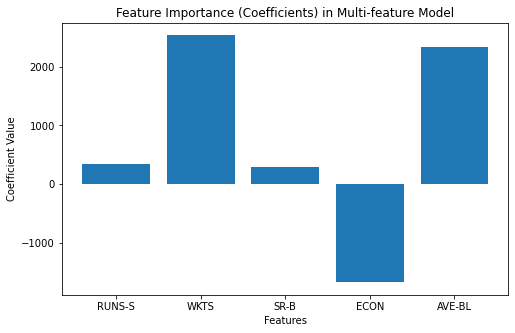

In [8]:
#4. Multi-feature Model for Auction Price 
#• Build a multiple linear regression model using both batting and bowling features (e.g., 
#RUNS-S, WKTS, SR-B, ECON, AVE-BL, etc.) to predict SOLD PRICE. 
#• Compare performance against single-feature models. 
#• Show feature importance (coefficients bar chart). 

features = ['RUNS-S', 'WKTS', 'SR-B', 'ECON', 'AVE-BL']
X = df[features]
y = df['SOLD PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

multi_lr = LinearRegression()
multi_lr.fit(X_train, y_train)

y_pred_multi = multi_lr.predict(X_test)

r2_multi = r2_score(y_test, y_pred_multi)
rmse_multi = np.sqrt(mean_squared_error(y_test, y_pred_multi))

print(f"Multi-feature Model R²: {r2_multi:.4f}")
print(f"Multi-feature Model RMSE: {rmse_multi:.2f}")

# Single feature model (RUNS-S)
X_train_single = X_train[['RUNS-S']]
X_test_single = X_test[['RUNS-S']]

single_lr = LinearRegression()
single_lr.fit(X_train_single, y_train)

y_pred_single = single_lr.predict(X_test_single)

r2_single = r2_score(y_test, y_pred_single)
rmse_single = np.sqrt(mean_squared_error(y_test, y_pred_single))

print(f"Single feature (RUNS-S) Model R²: {r2_single:.4f}")
print(f"Single feature (RUNS-S) Model RMSE: {rmse_single:.2f}")

coefficients = multi_lr.coef_
plt.figure(figsize=(8, 5))
plt.bar(features, coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance (Coefficients) in Multi-feature Model')
plt.show()

R² score: 0.3076


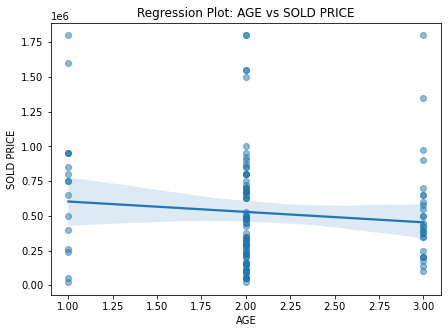

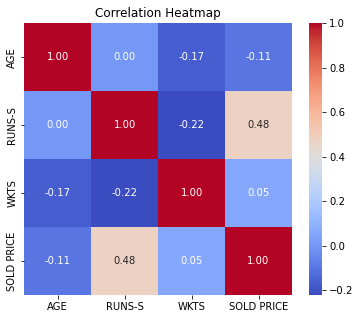

In [9]:
#5. Age Impact on Price 
#• Train a regression model to see if AGE and performance stats (RUNS, WKTS) explain 
#variations in SOLD PRICE. 
#• Evaluate correlation between AGE and price using regression plots. 
#• Visualize with heatmap of correlations. 

features = ['AGE', 'RUNS-S', 'WKTS']
X = df[features]
y = df['SOLD PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

age_model = LinearRegression()
age_model.fit(X_train, y_train)

y_pred = age_model.predict(X_test)

print(f"R² score: {r2_score(y_test, y_pred):.4f}")

plt.figure(figsize=(7,5))
sns.regplot(x='AGE', y='SOLD PRICE', data=df, scatter_kws={'alpha':0.5})
plt.title('Regression Plot: AGE vs SOLD PRICE')
plt.show()

corr_features = ['AGE', 'RUNS-S', 'WKTS', 'SOLD PRICE']
corr_matrix = df[corr_features].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<Figure size 576x360 with 0 Axes>

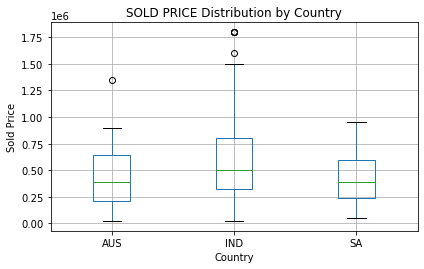

Country-wise R² scores for SOLD PRICE prediction:
IND: 0.148
AUS: 0.632
SA: 0.001


In [10]:
#6. Country-wise Price Prediction 
#• Build regression models for different COUNTRY groups (e.g., IND vs AUS vs SA). 
#• Compare model accuracies for each country. 
#• Use boxplots to visualize SOLD PRICE distribution by country.

# Filter valid entries
df = df.dropna(subset=["COUNTRY", "SOLD PRICE", "RUNS-S", "WKTS"])

# Select specific countries
countries = ['IND', 'AUS', 'SA']
r2_scores = {}

# Boxplot: SOLD PRICE by COUNTRY
plt.figure(figsize=(8, 5))
df[df['COUNTRY'].isin(countries)].boxplot(column='SOLD PRICE', by='COUNTRY')
plt.title('SOLD PRICE Distribution by Country')
plt.suptitle('')
plt.xlabel('Country')
plt.ylabel('Sold Price')
plt.grid(True)
plt.tight_layout()
plt.show()

# Regression for each country
for country in countries:
    subset = df[df['COUNTRY'] == country]
    X = subset[['RUNS-S', 'WKTS']]
    y = subset['SOLD PRICE']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    r2_scores[country] = round(r2, 3)

# Print R² scores
print("Country-wise R² scores for SOLD PRICE prediction:")
for country, score in r2_scores.items():
    print(f"{country}: {score}")


Strike Rate Prediction — R²: 0.352, RMSE: 31.06


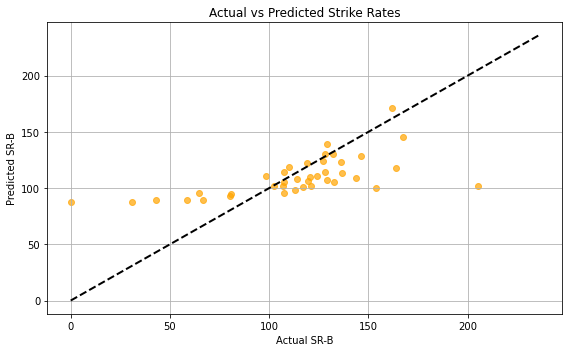

In [11]:
#7. Prediction of Strike Rate (Batting) 
#• Use player stats (RUNS-S, HS, SIXERS, AGE) to predict SR-B (Strike Rate) with linear 
#regression. 
#• Evaluate prediction accuracy. 
#• Plot actual vs predicted strike rates.

from sklearn.metrics import mean_squared_error

# Filter rows with necessary batting stats
batting_df = df.dropna(subset=["RUNS-S", "HS", "SIXERS", "AGE", "SR-B"])

# Define features and target
X = batting_df[["RUNS-S", "HS", "SIXERS", "AGE"]]
y = batting_df["SR-B"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
sr_model = LinearRegression()
sr_model.fit(X_train, y_train)
y_pred = sr_model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"\nStrike Rate Prediction — R²: {r2:.3f}, RMSE: {rmse:.2f}")

# Plot actual vs predicted SR-B
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='orange')
plt.xlabel("Actual SR-B")
plt.ylabel("Predicted SR-B")
plt.title("Actual vs Predicted Strike Rates")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.grid(True)
plt.tight_layout()
plt.show()